In [1]:
import pprint

import ee
from IPython.display import Image

import openet.core.common as common

ee.Initialize()

### Landsat Image

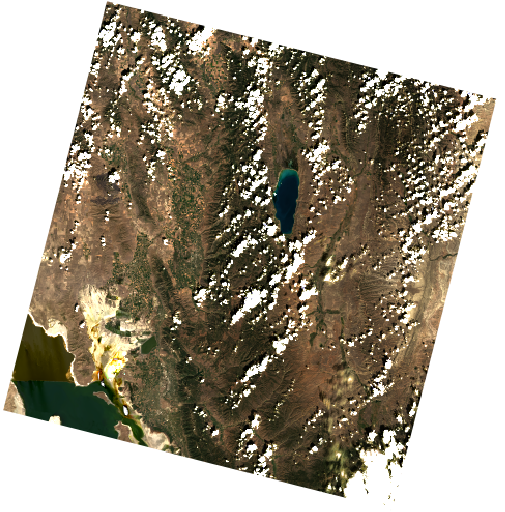

In [2]:
landsat_id = 'LC08_038031_20130828'  # Cloudy, some clear areas Bear Lake, UT
# landsat_id = 'LC08_044033_20170918'  # Cloudy, some clear areas over northern CV
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/{}'.format(landsat_id))
Image(url=landsat_img.select([3, 2, 1])\
          .multiply([0.0000275, 0.0000275, 0.0000275])\
          .add([-0.2, -0.2, -0.2])
          .getThumbURL({'min': 0.0, 'max': 0.3, 'dimensions':512}), 
      embed=True, format='png')

### Image List

In [3]:
# landsat_coll = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
#     .filterDate('2017-01-01', '2018-01-01')\
#     .filterMetadata('WRS_PATH', 'equals', 44)\
#     .filterMetadata('WRS_ROW', 'equals', 33)
# pprint.pprint(landsat_coll.aggregate_histogram('system:index').getInfo())

In [4]:
# landsat_id = 'LC08_044033_20170105'  # Cloudy over Sierra
# landsat_id = 'LC08_044033_20170121'  # Cloudy
# landsat_id = 'LC08_044033_20170206'  # Really cloudy
# landsat_id = 'LC08_044033_20170222'  # Really cloudy
# landsat_id = 'LC08_044033_20170427'  # Cloudy
# landsat_id = 'LC08_044033_20170513'  # Clear over CV
# landsat_id = 'LC08_044033_20170529'  # Clear over CV, some cirrus
# landsat_id = 'LC08_044033_20170614'  # Clear
# landsat_id = 'LC08_044033_20170630'  # Clear (small smoke plumes?)
# landsat_id = 'LC08_044033_20170716'  # Clear
# landsat_id = 'LC08_044033_20170801'  # Clear
# landsat_id = 'LC08_044033_20170817'  # Clear
# landsat_id = 'LC08_044033_20170902'  # Thin cirrus or smoke
# landsat_id = 'LC08_044033_20170918'  # Cloudy, some clear areas over northern CV
# landsat_id = 'LC08_044033_20171004'  # Clear
# landsat_id = 'LC08_044033_20171020'  # Really cloudy, some clear areas over northern CV
# landsat_id = 'LC08_044033_20171105'  # Few clouds over northern CV
# landsat_id = 'LC08_044033_20171121'  # Really cloudy, some clear areas over northern CV
# landsat_id = 'LC08_044033_20171207'  # Clear
# landsat_id = 'LC08_044033_20171223'  # Cloudy and cirrus over full image

### Study Area

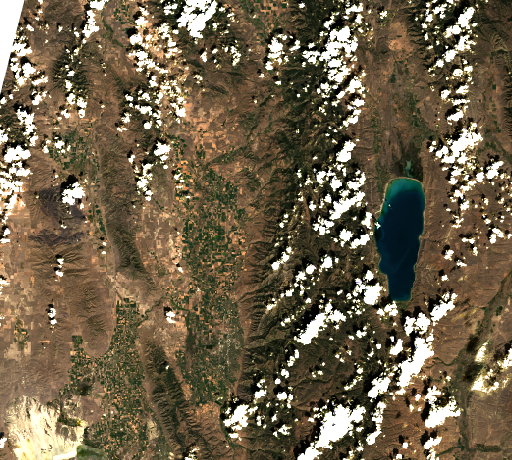

In [5]:
study_geom = ee.Geometry.Rectangle(-112.5, 41.50, -111.0, 42.50)
# study_geom = ee.Geometry.Rectangle(-121.85, 38.75, -120.55, 39.75)
study_region = study_geom.bounds(1, 'EPSG:4326')

Image(url=landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2'])\
          .multiply([0.0000275, 0.0000275, 0.0000275])\
          .add([-0.2, -0.2, -0.2])
          .getThumbURL({'min': 0.0, 'max': 0.3, 
                        'region': study_region, 'dimensions':512}), 
      embed=True, format='png')

In [6]:
### Cloud Mask

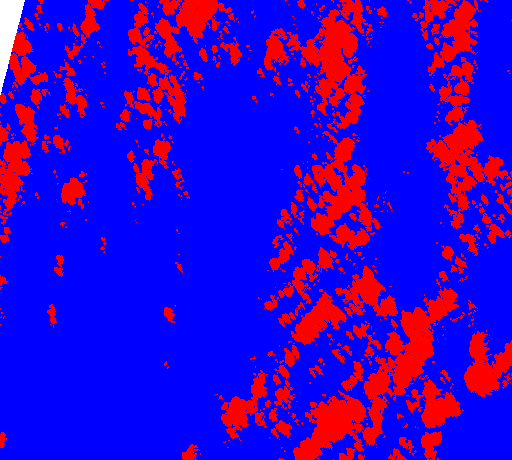

In [7]:
Image(url=common.landsat_c2_sr_cloud_mask(landsat_img)\
          .getThumbURL({'min': 0, 'max': 1, 'palette': ['ff0000', '0000ff'], 
                        'region': study_region, 'dimensions':512}), 
      embed=True, format='png')